# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

if False:
    miniNumSamples = 256
    human_files = human_files[:miniNumSamples]
    dog_files = dog_files[:miniNumSamples]

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


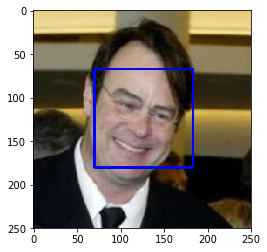

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

shortNumImages = 100 # Set to 100 for real

human_files_short = human_files[:shortNumImages]
dog_files_short = dog_files[:shortNumImages]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

def face_detector_test(files):
    count = 0;
    totalImages = len(files)
    for file in files:
        count += face_detector(file)
    percentDetect = 100 * count / totalImages
    return percentDetect, count, totalImages

In [5]:
# Print results from human_files_short
#print("Percent faces detected in human_files_short: {}% ({}/{})"
#      .format(face_detector_test(human_files_short)[0], 
#              face_detector_test(human_files_short)[1], 
#              face_detector_test(human_files_short)[2]))


# Print results from dog_files_short
#print("Percent faces detected in dog_files_short: {}% ({}/{})"
#      .format(face_detector_test(dog_files_short)[0], 
#              face_detector_test(dog_files_short)[1], 
#              face_detector_test(dog_files_short)[2]))

print("Running human face detector test...")

percentDetect, count, totalImages = face_detector_test(human_files_short)
# Print results from human_files_short
print("Percent faces detected in human_files_short: {}% ({}/{})"
      .format(percentDetect, count, totalImages))

percentDetect, count, totalImages = face_detector_test(dog_files_short)
# Print results from dog_files_short
print("Percent faces detected in dog_files_short: {}% ({}/{})"
      .format(percentDetect, count, totalImages))

Running human face detector test...
Percent faces detected in human_files_short: 98.0% (98/100)
Percent faces detected in dog_files_short: 17.0% (17/100)


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [7]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:12<00:00, 45504498.79it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [8]:
from PIL import Image
import torchvision.transforms as transforms


def load_image(img_path):
    image = Image.open(img_path).convert('RGB') # VGG inputs an RGB image
    
    # Resize image to 224 by 224 tensor for input into VGG16
    in_transform = transforms.Compose([
                   transforms.Resize(size = (224,224)),
                   transforms.ToTensor(),
                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image).unsqueeze(0)
    
    return image

In [9]:

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
        
    output = VGG16(img)
    
    #print(torch.max(output, 1))
    
    predictedClass =  torch.max(output, 1)[1].item()
    
    #print("Predicted Class:", predictedClass)
    
    return predictedClass # predicted class index

In [10]:
# predict dog using ImageNet class
VGG16_predict(dog_files_short[54])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [11]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    predictClass = VGG16_predict(img_path)
    
    return (predictClass >= 151) and (predictClass <= 268) # true/false

    #if (predictClass >= 151) and (predictClass <= 268):
    #    dogPresent = True
    #else:
    #    dogPresent = False
    #
    #return dogPresent # true/false

In [12]:
print(dog_detector(dog_files_short[0]))
print(dog_detector(human_files_short[0]))

True
False


### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [13]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

def dog_detector_test(files):
    count = 0;
    totalImages = len(files)
    for file in files:
        count += dog_detector(file)
    percentDetect = 100 * count / totalImages
    return percentDetect, count, totalImages

In [14]:
# Print results

print("Running dog detector test...")

percentDetect, count, totalImages = dog_detector_test(human_files_short)
# Print results from human_files_short
print("Percent of images with a dog detected in human_files_short: {}% ({}/{})"
      .format(percentDetect, count, totalImages))

percentDetect, count, totalImages = dog_detector_test(dog_files_short)
# Print results from dog_files_short
print("Percent of images with a dog detected in dog_files_short: {}% ({}/{})"
      .format(percentDetect, count, totalImages))

Running dog detector test...
Percent of images with a dog detected in human_files_short: 1.0% (1/100)
Percent of images with a dog detected in dog_files_short: 100.0% (100/100)


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define training, validation, and test data directories
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

In [17]:

# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 224

# Training data transform - Resize image to 224 by 224 tensor for input into VGG16
dataTrain_transform = transforms.Compose([
                #transforms.ToPILImage(),             
                transforms.Resize(size=(image_size,image_size)),
                transforms.CenterCrop(image_size),
                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])            
                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ])

# Test and validation data transform - Resize image to 224 by 224 tensor for input into VGG16
dataTest_transform = transforms.Compose([
                #transforms.ToPILImage(),             
                transforms.Resize(size=(image_size,image_size)),
                #transforms.CenterCrop(image_size),
                #transforms.RandomHorizontalFlip(), # randomly flip and rotate
                #transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])            
                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ])

train_data = datasets.ImageFolder(train_dir, transform=dataTrain_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=dataTest_transform)
test_data = datasets.ImageFolder(test_dir, transform=dataTest_transform)

# print out some data stats
print('# of training images: ', len(train_data))
print('# of validation images: ', len(valid_data))
print('# of test images: ', len(test_data))

# of training images:  6680
# of validation images:  835
# of test images:  836


In [18]:

# define dataloader parameters
batch_size = 32
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=False)

loaders_scratch = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: 
A) I resize and center crop the input image tensors to be 224-by-224 pixels. Using a larger pixel count to hopefully provide more resolution to differentiate similar dog breeds
B) I augment the training data set using random flips and rotations to hopefully make the training data set more robust. These augmentation transforms are not performed on the validation or test data sets. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [19]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

num_classes = 133 # Number of classes of dog breeds

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, stride=2, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=2, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 7 * 7 -> 512)
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        # linear layer (500 -> 512)
        self.fc2 = nn.Linear(512, 256)
        # linear layer (256 -> 133)
        self.fc3 = nn.Linear(256, num_classes)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        ## Define forward behavior
        
        #print("a0: ",x.shape)
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        #print("a01: ",x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print("a02: ",x.shape)
        x = self.pool(F.relu(self.conv3(x)))

        #print("a1: ",x.shape)
        # flatten image input
        x = x.view(-1, 64 * 7 * 7)
        
        #print("a2: ",x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        #print("a3: ",x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        
        #print("a4: ",x.shape)
        # add dropout layer
        x = self.dropout(x)
        # add 3rd hidden layer
        x = self.fc3(x)
        
        #print("a5: ",x.shape)
        
        return x
    

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I used a vanilla CNN architecture consisting of two-dimensional convoltion layers and 2-by-2 max pooling layers with three fully connected layers at the end. This architecture is based on CNN used in the course's CIFAR-10 CNN example. However, I added an extra fully-connected (fc) layer at the end and used 25% dropout in-between each fc layer to improve robustness. I did not add more convolutional layers or increase the size of the layers to reduce training time given the relatively low accuracy requirements. Each fc layer reduces in size by approximately a factor of two. I used ReLu as my activation function to avoid vanishing gradients. To reduce the number of parameters, I use a stride of 2 on the first two convolutional layers. For each convolutional layer, I also used 3-by-3 kernals and padding of 1.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [20]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)
#optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [21]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    print("Begin training...")
    
    for epoch in range(1, n_epochs+1):
        #print("Epoch: ",epoch)
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if batch_idx % 50 == 0:
                print("Epoch: {}, Batch: {}".format(epoch,batch_idx))
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, valid_loss))
                
            valid_loss_min = valid_loss
    
    print("Training Complete!")
    # return trained model
    return model



In [22]:
n_epochs = 12 # Number of training epochs # Use 12 for real

# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Begin training...
Epoch: 1, Batch: 0
Epoch: 1, Batch: 50
Epoch: 1, Batch: 100
Epoch: 1, Batch: 150
Epoch: 1, Batch: 200
Epoch: 1 	Training Loss: 4.861398 	Validation Loss: 4.706468
Validation loss decreased (inf --> 4.706468).  Saving model ...
Epoch: 2, Batch: 0
Epoch: 2, Batch: 50
Epoch: 2, Batch: 100
Epoch: 2, Batch: 150
Epoch: 2, Batch: 200
Epoch: 2 	Training Loss: 4.509511 	Validation Loss: 4.372602
Validation loss decreased (4.706468 --> 4.372602).  Saving model ...
Epoch: 3, Batch: 0
Epoch: 3, Batch: 50
Epoch: 3, Batch: 100
Epoch: 3, Batch: 150
Epoch: 3, Batch: 200
Epoch: 3 	Training Loss: 4.305791 	Validation Loss: 4.326567
Validation loss decreased (4.372602 --> 4.326567).  Saving model ...
Epoch: 4, Batch: 0
Epoch: 4, Batch: 50
Epoch: 4, Batch: 100
Epoch: 4, Batch: 150
Epoch: 4, Batch: 200
Epoch: 4 	Training Loss: 4.154988 	Validation Loss: 4.147232
Validation loss decreased (4.326567 --> 4.147232).  Saving model ...
Epoch: 5, Batch: 0
Epoch: 5, Batch: 50
Epoch: 5, Batch: 100

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [23]:
def test(loaders, model, criterion, use_cuda):
    
    print("Begin Test!")
    
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))


In [24]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Begin Test!
Test Loss: 3.709889


Test Accuracy: 13% (110/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders

import os
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# define training, validation, and test data directories
data_dir = '/data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')


In [26]:
# Spatial size of training images. All images will be resized to this
#   size using a transformer.
image_size = 224

# Training data transform - Resize image to 224 by 224 tensor for input into VGG16
dataTrain_transform = transforms.Compose([
                #transforms.ToPILImage(),             
                transforms.Resize(size=(image_size,image_size)),
                transforms.CenterCrop(image_size),
                transforms.RandomHorizontalFlip(), # randomly flip and rotate
                transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])            
                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ])

# Test and validation data transform - Resize image to 224 by 224 tensor for input into VGG16
dataTest_transform = transforms.Compose([
                #transforms.ToPILImage(),             
                transforms.Resize(size=(image_size,image_size)),
                #transforms.CenterCrop(image_size),
                #transforms.RandomHorizontalFlip(), # randomly flip and rotate
                #transforms.RandomRotation(15),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])            
                #transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                ])

train_data = datasets.ImageFolder(train_dir, transform=dataTrain_transform)
valid_data = datasets.ImageFolder(valid_dir, transform=dataTest_transform)
test_data = datasets.ImageFolder(test_dir, transform=dataTest_transform)

# print out some data stats
print('# of training images: ', len(train_data))
print('# of validation images: ', len(valid_data))
print('# of test images: ', len(test_data))

# of training images:  6680
# of validation images:  835
# of test images:  836


In [27]:
# define dataloader parameters
batch_size = 32
num_workers = 0

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
                                          num_workers=num_workers, shuffle=False)

loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}

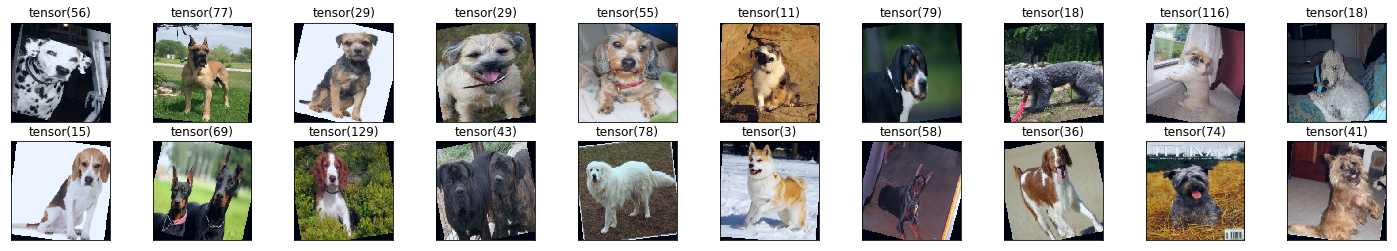

In [28]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    #print(np.max(images[idx]))
    #print(np.min(images[idx]))
    scaledImage = images[idx] - np.min(images[idx])
    scaledImage = scaledImage / np.max(scaledImage)
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(scaledImage, (1, 2, 0)))
    #plt.imshow(np.transpose((images[idx]+1)/2, (1, 2, 0)))
    ax.set_title(labels[idx])

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [29]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 

# Load the pretrained model from pytorch
#vgg16 = models.vgg16(pretrained=True)
#model_transfer = torchvision.models.resnet18(pretrained=True)
model_transfer = torchvision.models.resnet101(pretrained=True)


Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:03<00:00, 52804627.82it/s]


In [30]:
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

In [31]:
print(model_transfer.fc.in_features) 
print(model_transfer.fc.out_features)

# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False

2048
1000


In [32]:
import torch.nn as nn

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    model_transfer = model_transfer.cuda()

num_classes = 133 # Number of classes of dog breeds
    
n_inputs = model_transfer.fc.in_features

# add last linear layer (n_inputs -> 133 dog breed classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, num_classes, bias=True)

model_transfer.fc = last_layer

# if GPU is available, move the model to GPU
if use_cuda:
    model_transfer.cuda()

# check to see that your last layer produces the expected number of outputs
print(model_transfer.fc.out_features)

133


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

For this transfer learning CNN exercise, I used the Resnet 101 architecture due to its high accuracy on the ImageNet data set and relatively large number of layers. Pretrained models trained on ImageNet are suitable for this task because the orginal data set included dog images. I modify the final fully-connected (fc) layer to map from 512 inputs to 133 outputs (from an orginal 1000 outputs for ImageNet) to match the number of dog breed classes. I used cross entropy loss as the criterion and SGD w/ momentum as the optimizer. The network passed the 60% test accuracy requirement in only a couple of training epochs so minimal hyperparmeter tuning was required. Transfer learning was well suited for this problem because a relatively large dog image training data set is available and a number of dog breeds are available in the original ImageNet data set that ResNet was trained on.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [33]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [34]:
# train the model
#model_transfer = # train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
#model_transfer.load_state_dict(torch.load('model_transfer.pt'))

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    print("Begin training...")
    
    for epoch in range(1, n_epochs+1):
        #print("Epoch: ",epoch)
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            if batch_idx % 50 == 0:
                print("Epoch: {}, Batch: {}".format(epoch,batch_idx))
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            
            # perform a single optimization step (parameter update)
            optimizer.step()
            
            # record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            
            # calculate the batch loss
            loss = criterion(output, target)
            
            # update average validation loss 
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            torch.save(model.state_dict(), save_path)
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min, valid_loss))
                
            valid_loss_min = valid_loss
                
    print("Training Complete!")
    # return trained model
    return model

In [35]:
n_epochs = 5; # Number of training epochs # Run 5 for real

train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Begin training...
Epoch: 1, Batch: 0
Epoch: 1, Batch: 50
Epoch: 1, Batch: 100
Epoch: 1, Batch: 150
Epoch: 1, Batch: 200
Epoch: 1 	Training Loss: 4.193679 	Validation Loss: 3.358105
Validation loss decreased (inf --> 3.358105).  Saving model ...
Epoch: 2, Batch: 0
Epoch: 2, Batch: 50
Epoch: 2, Batch: 100
Epoch: 2, Batch: 150
Epoch: 2, Batch: 200
Epoch: 2 	Training Loss: 2.856301 	Validation Loss: 2.298437
Validation loss decreased (3.358105 --> 2.298437).  Saving model ...
Epoch: 3, Batch: 0
Epoch: 3, Batch: 50
Epoch: 3, Batch: 100
Epoch: 3, Batch: 150
Epoch: 3, Batch: 200
Epoch: 3 	Training Loss: 2.048427 	Validation Loss: 1.714647
Validation loss decreased (2.298437 --> 1.714647).  Saving model ...
Epoch: 4, Batch: 0
Epoch: 4, Batch: 50
Epoch: 4, Batch: 100
Epoch: 4, Batch: 150
Epoch: 4, Batch: 200
Epoch: 4 	Training Loss: 1.601143 	Validation Loss: 1.361027
Validation loss decreased (1.714647 --> 1.361027).  Saving model ...
Epoch: 5, Batch: 0
Epoch: 5, Batch: 50
Epoch: 5, Batch: 100

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [36]:
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [37]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Begin Test!
Test Loss: 1.226123


Test Accuracy: 77% (649/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [38]:
print(loaders_transfer['train'].dataset)

Dataset ImageFolder
    Number of datapoints: 6680
    Root Location: /data/dog_images/train/
    Transforms (if any): Compose(
                             Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             RandomHorizontalFlip(p=0.5)
                             RandomRotation(degrees=(-15, 15), resample=False, expand=False)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None


In [39]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

print(class_names[:10])


['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog']


In [40]:
from PIL import Image
import torchvision.transforms as transforms
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_predict_image(img_path):
    #print(img_path)
    image = Image.open(img_path).convert('RGB') # VGG inputs an RGB image
    
    plt.imshow(image)
    plt.show()

    # Resize image to 224 by 224 tensor for input into VGG16
    in_transform = transforms.Compose([
                   transforms.Resize(size = (224,224)),
                   transforms.ToTensor(),
                   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                         std=[0.229, 0.224, 0.225])])

    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image).unsqueeze(0)
    
    return image

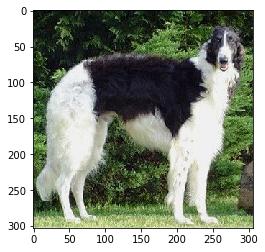

In [41]:
imgTest = load_predict_image(dog_files[174])

In [42]:
def predict_breed_transfer(img_path, model, class_names):
    # load the image and return the predicted breed
    img = load_predict_image(img_path)
    model = model.cpu()
    model.eval()
    idx = torch.argmax(model(img))
    return class_names[idx]

In [43]:
print(os.listdir('./images'))

#print(os.path.join('./images', img_file))

['Welsh_springer_spaniel_08203.jpg', 'Brittany_02625.jpg', 'Labrador_retriever_06449.jpg', 'Curly-coated_retriever_03896.jpg', 'sample_cnn.png', 'Labrador_retriever_06455.jpg', 'Labrador_retriever_06457.jpg', 'sample_dog_output.png', 'sample_human_output.png', 'American_water_spaniel_00648.jpg']


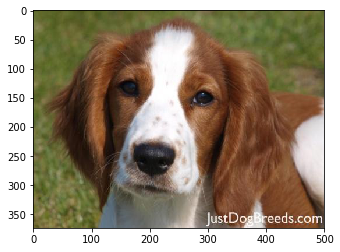

Image: Welsh_springer_spaniel_08203.jpg, 	 Predicted Breed: Welsh springer spaniel


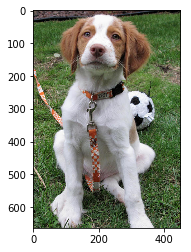

Image: Brittany_02625.jpg, 	 Predicted Breed: Brittany


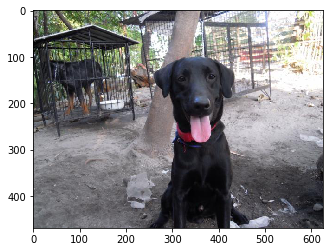

Image: Labrador_retriever_06449.jpg, 	 Predicted Breed: Flat-coated retriever


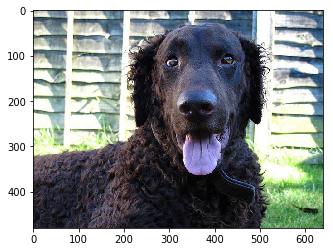

Image: Curly-coated_retriever_03896.jpg, 	 Predicted Breed: Curly-coated retriever


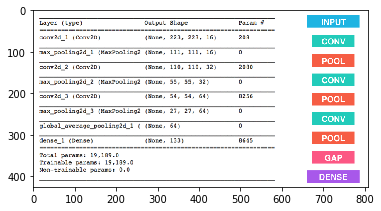

Image: sample_cnn.png, 	 Predicted Breed: Australian cattle dog


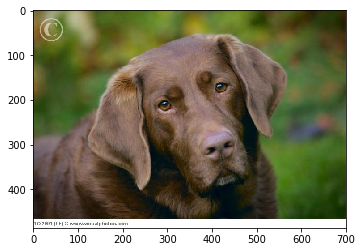

Image: Labrador_retriever_06455.jpg, 	 Predicted Breed: Labrador retriever


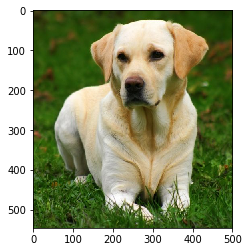

Image: Labrador_retriever_06457.jpg, 	 Predicted Breed: Labrador retriever


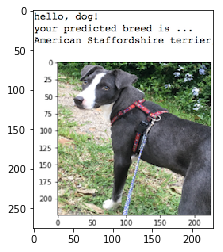

Image: sample_dog_output.png, 	 Predicted Breed: Great dane


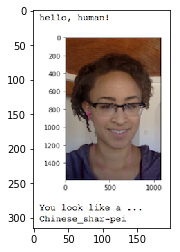

Image: sample_human_output.png, 	 Predicted Breed: Chinese crested


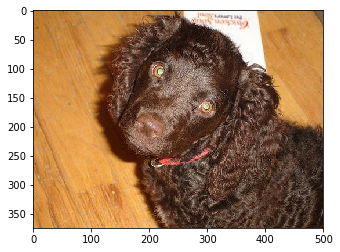

Image: American_water_spaniel_00648.jpg, 	 Predicted Breed: Boykin spaniel


In [44]:
for img_file in os.listdir('./images'):
    #print(img_file)
    img_path = os.path.join('./images', img_file)
    #print(img_path)
    pred = predict_breed_transfer(img_path, model_transfer, class_names)
    print("Image: {}, \t Predicted Breed: {}".format(img_file, pred))

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [45]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    #img = load_predict_image(img_path)
    
    pred = predict_breed_transfer(img_path, model_transfer, class_names)
    
    dogPresent = dog_detector(img_path);
    facePresent = face_detector(img_path)
    
    #print("Dog Present: ", dogPresent)
    #print("Face Present: ", facePresent)
    
    # if dog
    if dogPresent:
        print("Dog detected! Predicted Breed: ", pred)
    # if human face
    elif facePresent:
        print("Human face detected! This face most closely resembles a", pred)
    # else
    else:
        print('No human or dog faces detected!')
    

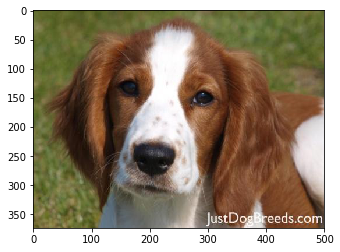

Dog detected! Predicted Breed:  Welsh springer spaniel


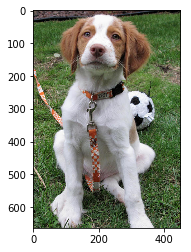

Dog detected! Predicted Breed:  Brittany


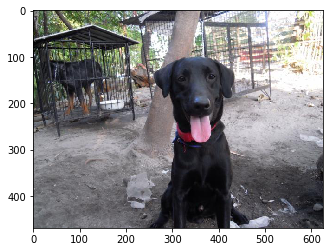

Dog detected! Predicted Breed:  Flat-coated retriever


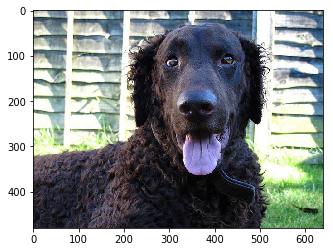

Dog detected! Predicted Breed:  Curly-coated retriever


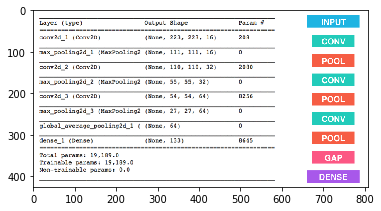

No human or dog faces detected!


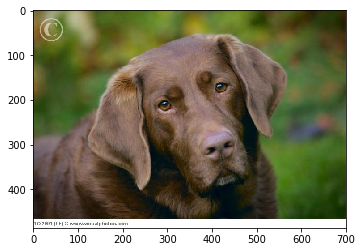

Dog detected! Predicted Breed:  Labrador retriever


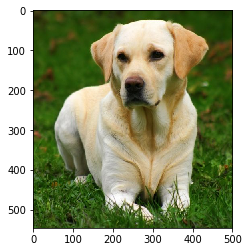

Dog detected! Predicted Breed:  Labrador retriever


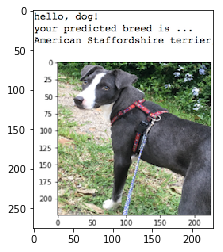

Dog detected! Predicted Breed:  Great dane


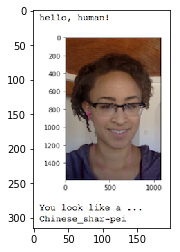

Human face detected! This face most closely resembles a Chinese crested


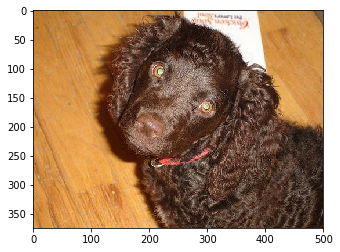

Dog detected! Predicted Breed:  Boykin spaniel


In [46]:
import os

for img_file in os.listdir('./images'):
    img_path = os.path.join('./images', img_file)
    run_app(img_path)

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output is better than I expected given the relatively small amount of training and limited GPU time.

Possible improvements:

A) More hyperparameter tuning and training epochs

B) Use a different optimizer such as Adam or Adagrad

C) Use a larger and more robust training data set with more dog images

D) Use a pre-trained network with more layers 

E) Use more random image transformations to augment training data set, such as flips, rotations, cropping, and size scaling

In [47]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

import numpy as np


In [48]:
my_human_files = ['./myImages/humans/human2.jpg', 
                  './myImages/humans/human1.jpg', 
                  './myImages/humans/human3.jpeg',
                  './myImages/humans/human4.jpg']
                  #'./myImages/humans/human5.jpg',
                  #'./myImages/humans/human6.jpg']

my_dog_files = ['./myImages/dogs/dog1.jpg', 
                './myImages/dogs/dog2.jpg', 
                './myImages/dogs/dog3.jpg',
                './myImages/dogs/dog4.jpg']

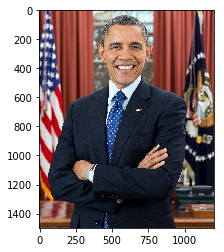

Human face detected! This face most closely resembles a Irish wolfhound


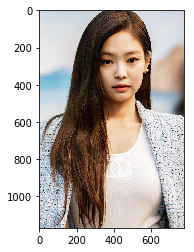

Human face detected! This face most closely resembles a Chinese crested


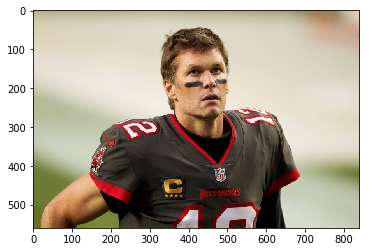

Human face detected! This face most closely resembles a Belgian tervuren


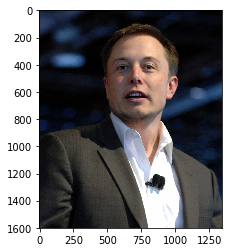

Human face detected! This face most closely resembles a Welsh springer spaniel


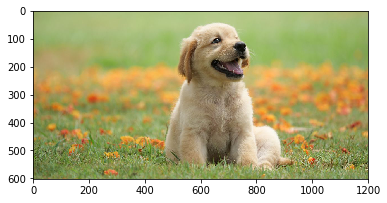

Dog detected! Predicted Breed:  Golden retriever


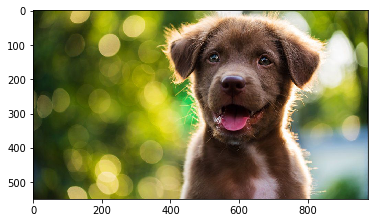

Dog detected! Predicted Breed:  Nova scotia duck tolling retriever


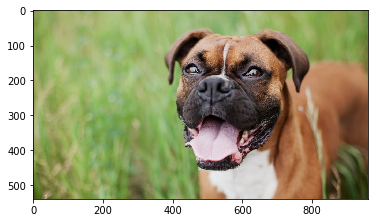

Dog detected! Predicted Breed:  Boxer


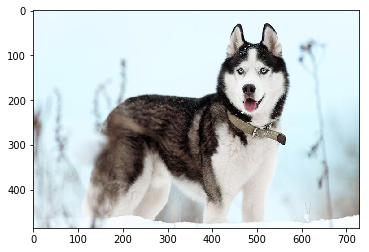

Dog detected! Predicted Breed:  Alaskan malamute


In [49]:
## suggested code, below
for file in np.hstack((my_human_files[:], my_dog_files[:])):
    run_app(file)